<a href="https://www.kaggle.com/code/arihant18/spam-message-detector?scriptVersionId=191039891" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Import Modules

In [1]:
import pandas as pd
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense
from keras import Sequential
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import pickle

2024-08-03 14:41:22.568523: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-03 14:41:22.568652: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-03 14:41:22.725871: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Data Loading

In [2]:
data=pd.read_csv('/kaggle/input/spam-text-message-classification/SPAM text message 20170820 - Data.csv')
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
classes=list(data.Category.unique())
classes

['ham', 'spam']

## Data preprocessing

In [4]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['Message'])

In [5]:
seq=tokenizer.texts_to_sequences(data['Message'])

In [6]:
maxlen=max(len(x)for x in seq)
maxlen

189

In [7]:
Num=len(tokenizer.word_index)+1
Num

9005

In [8]:
data['label']=[int(data['Category'][i]=='spam') for i in range(len(data['Category']))]
data.head()

,Category,Message,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [9]:
print("Total no. of examples in data set is :",len(data.label))

Total no. of examples in data set is : 5572


In [10]:
X = pad_sequences(seq, maxlen)
print(X[:2])

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0   49  471 4426  840  755  658   65    8 1327   88  123  351 1328
   148 2993 1329   67   58 4427  144]
 [   0    0    0    0    0

In [11]:
Y=np.array(data.label).reshape(-1,1)
print(X.shape, Y.shape)

(5572, 189) (5572, 1)


In [12]:
x_train, x_val, y_train, y_val = train_test_split(X, Y, random_state=35, test_size=0.2)
print(x_train.shape, y_train.shape)

(4457, 189) (4457, 1)


## Model

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 189, 512)       │     4,610,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 189, 512)       │     1,574,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 256)            │       656,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,842,113 (26.10 MB)

 Trainable params: 6,842,113 (26.10 MB)

 Non-trainable params: 0 (0.00 B)

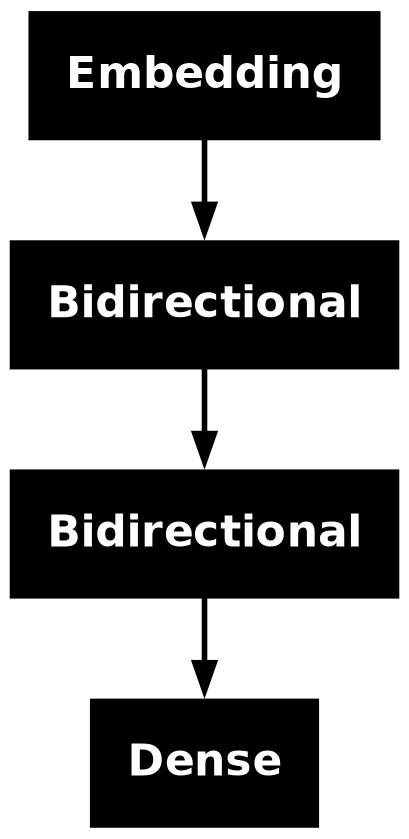

In [13]:
model = Sequential([
    Input(shape=(189,)),
    Embedding(Num, 512),
    Bidirectional(LSTM(256, return_sequences=True, dropout=0.25)),
    Bidirectional(LSTM(128, dropout=0.25)),
    Dense(1, activation='sigmoid')
])
model.summary()
plot_model(model)

In [14]:
model.compile(
    loss='BinaryCrossentropy', 
    optimizer='adam', 
    metrics=['f1_score', 'accuracy']
)

History = model.fit(
    x_train, y_train, 
    epochs=5,  #from prev trails, We know that 5 epochs is enough.
    batch_size=64,
    validation_data=(x_val, y_val)
).history

Epoch 1/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 74s 907ms/step - accuracy: 0.8791 - f1_score: 0.2464 - loss: 0.2614 - val_accuracy: 0.9883 - val_f1_score: 0.2565 - val_loss: 0.0410
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 62s 883ms/step - accuracy: 0.9914 - f1_score: 0.2381 - loss: 0.0355 - val_accuracy: 0.9874 - val_f1_score: 0.2565 - val_loss: 0.0458
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 62s 883ms/step - accuracy: 0.9976 - f1_score: 0.2310 - loss: 0.0149 - val_accuracy: 0.9874 - val_f1_score: 0.2565 - val_loss: 0.0485
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 62s 883ms/step - accuracy: 0.9968 - f1_score: 0.2385 - loss: 0.0157 - val_accuracy: 0.9848 - val_f1_score: 0.2565 - val_loss: 0.0432
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 82s 886ms/step - accuracy: 0.9987 - f1_score: 0.2393 - loss: 0.0058 - val_accuracy: 0.9874 - val_f1_score: 0.2565 - val_loss: 0.0539


## Model Evaluation

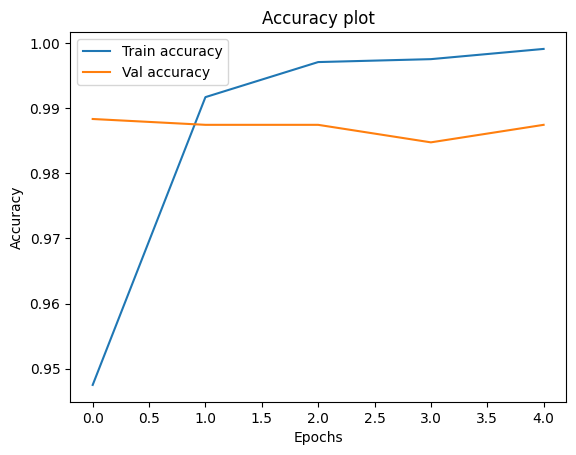

In [15]:
plt.title('Accuracy plot')
plt.plot(History['accuracy'])
plt.plot(History['val_accuracy'])
plt.legend(['Train accuracy', 'Val accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs');

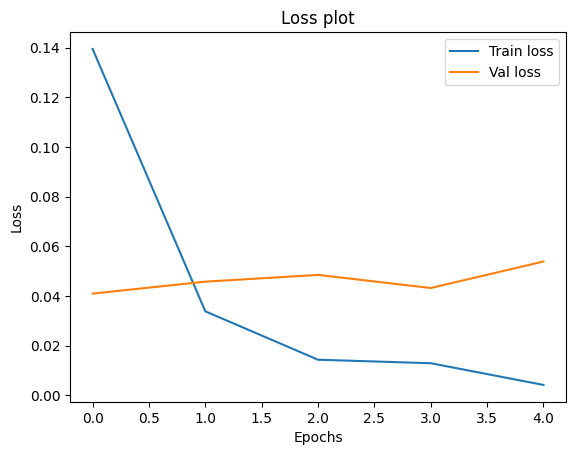

In [16]:
plt.title('Loss plot')
plt.plot(History['loss'])
plt.plot(History['val_loss'])
plt.legend(['Train loss', 'Val loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs');

In [17]:
for i in tokenizer.sequences_to_texts(x_val[:5]):
    print(i,"\n")

hey i booked the kb on sat already what other lessons are we going for ah keep your sat night free we need to meet and confirm our lodging 

yeah i got a list with only u and joanna if i'm feeling really anti social 

so when you gonna get rimac access 

ur awarded a city break and could win a £200 summer shopping spree every wk txt store to 88039 skilgme tscs087147403231winawk age16 £1 50perwksub 

what you doing how are you 



In [18]:
[classes[x] for x in np.sum(model.predict(x_val[:5])>=0.5, axis=-1)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 777ms/step


['ham', 'ham', 'ham', 'spam', 'ham']

In [21]:
[classes[x] for x in y_val[:5,0]]

['ham', 'ham', 'ham', 'spam', 'ham']

In [23]:
model.save('model.keras')
pickle.dump(tokenizer, open('Tokenizer.pkl', 'wb'))